# Imports and inits

In [ ]:
import os
import numpy as np
import pandas as pd
import sqlite3
import json
from datetime import datetime, timedelta
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")

drive.mount('/content/gdrive/', force_remount=True)
os.chdir("/content/gdrive/Shareddrives/ECS 260/final")

Mounted at /content/gdrive/


In [ ]:
# getting columns to analyze
with open('columns_to_analyze.txt', "r") as file:
  columns_to_analyze = file.read()
columns_to_analyze = json.loads(columns_to_analyze)
print(f"{len(columns_to_analyze)} columns to analyze:")
for i in range(len(columns_to_analyze)):
  column = columns_to_analyze[i]
  print(f"{i + 1} --> {column}")

31 columns to analyze:
1 --> no_of_versions
2 --> no_of_users
3 --> has_readme
4 --> has_homepage
5 --> is_deprecated
6 --> no_of_dependencies
7 --> lagging_dependencies_count
8 --> unpack_size
9 --> file_count
10 --> has_repository
11 --> rank
12 --> dependants_count
13 --> dependant_repos_count
14 --> forks
15 --> stars
16 --> watchers
17 --> issues
18 --> pr
19 --> contributors
20 --> no_of_commits
21 --> avg_commit_freq
22 --> total_lines_of_code
23 --> sloc
24 --> no_of_files
25 --> health_score
26 --> security_numeric
27 --> popularity_numeric
28 --> maintenance_numeric
29 --> community_numeric
30 --> avg_monthly_download
31 --> days_since_last_modification


In [ ]:
def get_df(query):
  conn = sqlite3.connect("final_database.db")
  cursor = conn.cursor()
  df = pd.read_sql_query(query, conn)
  conn.close()
  return df
def select_column(column):
  return f"SELECT {column} FROM package_data WHERE {column} IS NOT NULL"

In [ ]:
# function to format each value in regular notation
def format_values(value):
  if isinstance(value, (int, float)):
    return "{:,.2f}".format(value)
  return value

In [ ]:
def get_df_and_formatted_stats(column):
  df = get_df(select_column(column))
  formatted_stats = df.describe().apply(format_values)
  # display the formatted statistics
  print(formatted_stats)
  return df, formatted_stats

In [ ]:
def visualize_distribution(df, column, outliers_removed=False):
  print("----------------------------------------------------------------------------------------------")
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
  # plotting histogram
  sns.histplot(df, bins=30, kde=True, ax=axes[0])
  axes[0].set_title(f'Histogram of {column}' + ' (outliers removed)' if outliers_removed else '')
  axes[0].set_xlabel(f'{column}')
  axes[0].set_ylabel('Frequency')

  # plottin boxplot
  sns.boxplot(x=df, ax=axes[1])
  axes[1].set_title(f'Boxplot of {column}' + ' (outliers removed)' if outliers_removed else '')
  axes[1].set_xlabel(column)

  # plotting Q-Q plots
  stats.probplot(df, dist="norm", plot=axes[2])
  axes[2].set_title(f'Q-Q Plot of {column}' + ' (outliers removed)' if outliers_removed else '')

  # to ensures proper spacing between subplots
  plt.tight_layout()
  plt.show()

In [ ]:
def remove_outliers(df, column):
  # taking care of outliers
  z_scores = stats.zscore(df[column])
  # setting threshold for Z-score
  threshold = 2.7
  # Filtering out rows with Z-scores beyond the threshold
  return df[(abs(z_scores) < threshold)]

def visualize_column(df, column):
  print("Observing original distributions")
  visualize_distribution(df[column], column)
  print("\n\n")

  print("Observing log distributions")
  visualize_distribution(np.log(df[column]), column)
  print("\n\n")


  # taking care of outliers
  z_scores = stats.zscore(df[column])
  # setting threshold for Z-score
  threshold = 2.7
  # Filtering out rows with Z-scores beyond the threshold
  outliers_removed_df = remove_outliers(df, column)

  print("Observing original distributions after taking care of outliers")
  visualize_distribution(outliers_removed_df[column], column, outliers_removed=True)
  print("\n\n")

  print("Observing log distributions after taking care of outliers")
  visualize_distribution(np.log(outliers_removed_df[column]), column, outliers_removed=True)
  print("\n\n")

# Column analyses

###### Exploring column `no_of_versions`

Not using this column as data is not normally distributed, and states can not be readily inferred from the distribution

       no_of_versions
count    29792.000000
mean        15.610097
std         96.972971
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       6409.000000

Observing original distributions
----------------------------------------------------------------------------------------------


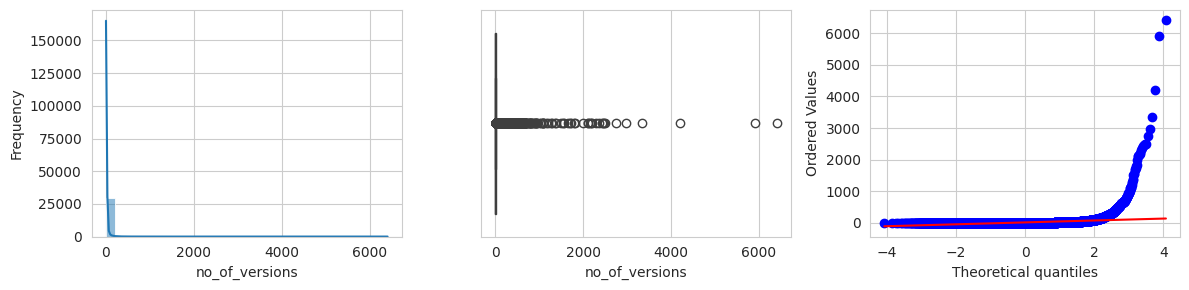




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


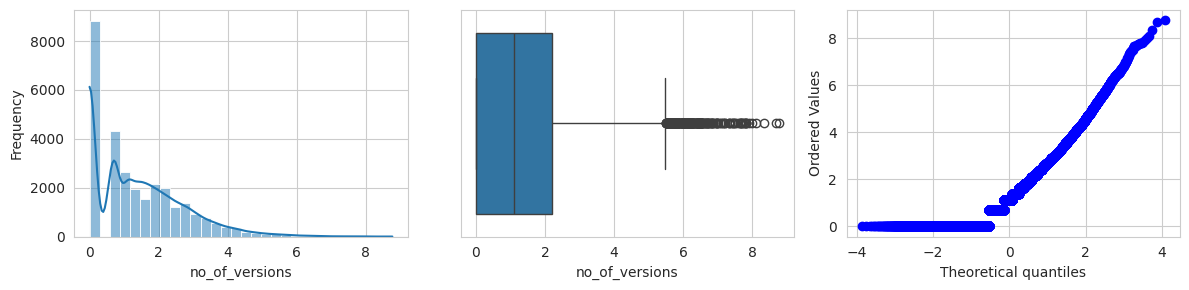




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


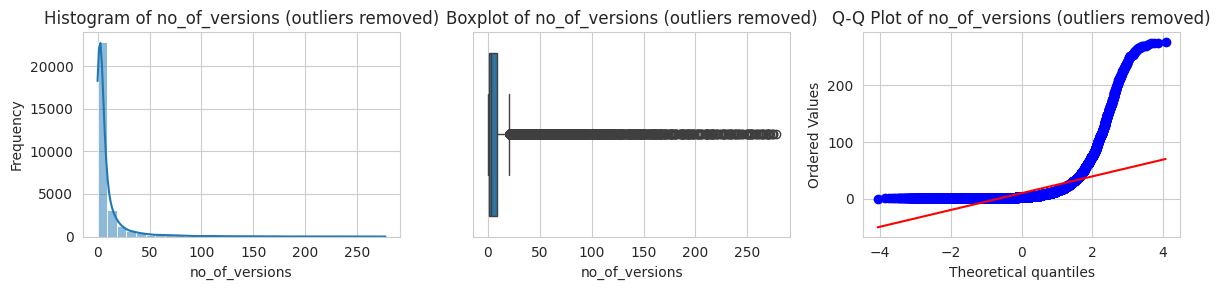




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


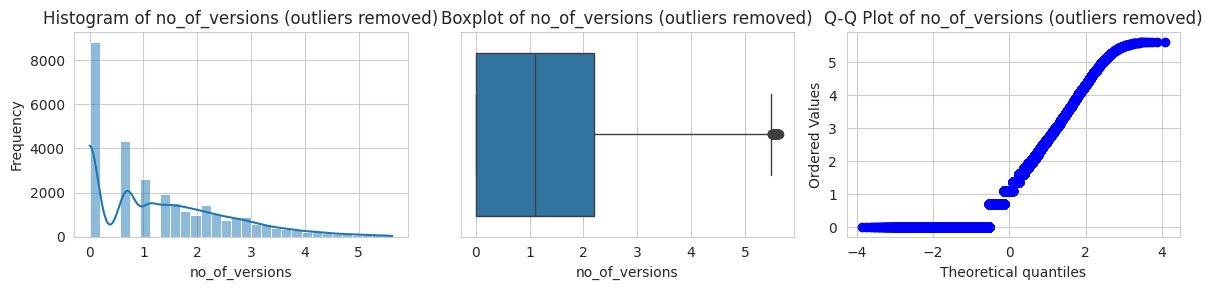

In [ ]:
column = 'no_of_versions'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

###### Exploring column `no_of_users`

Not using this column as count is significantly low than database size

       no_of_users
count   844.000000
mean      3.342417
std      14.143983
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max     286.000000

Observing original distributions
----------------------------------------------------------------------------------------------


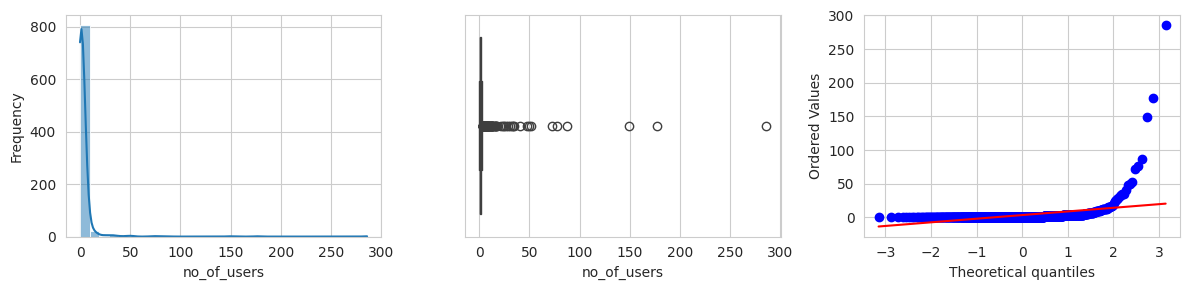




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


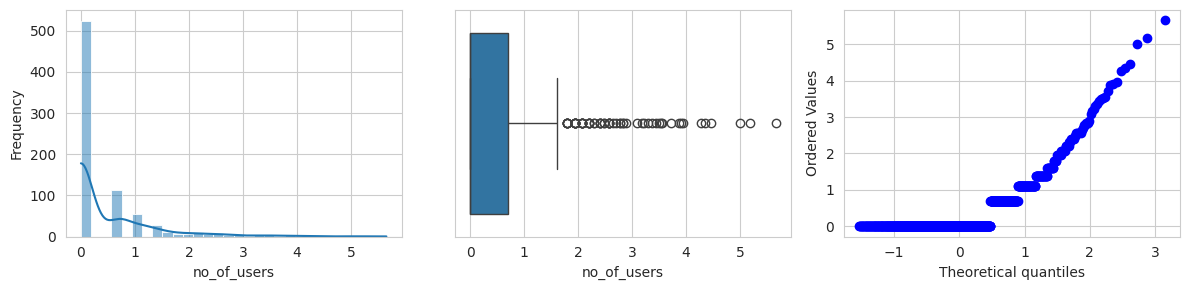




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


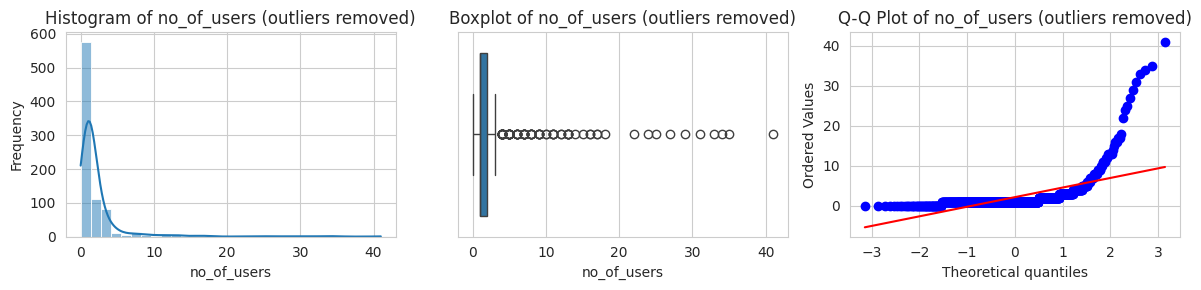




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


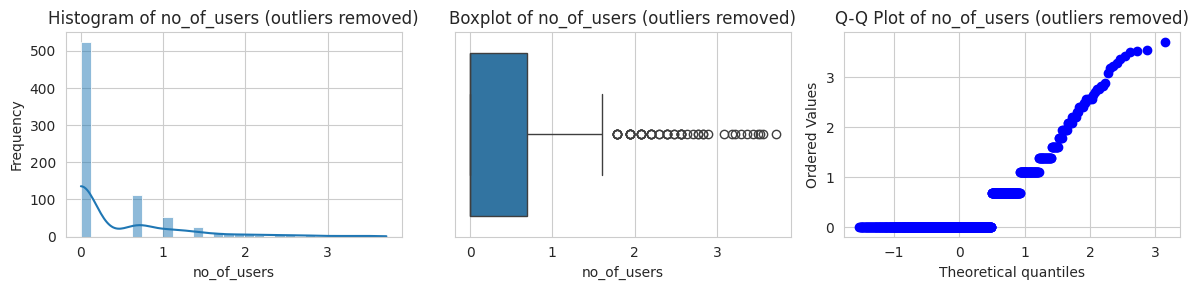

In [ ]:
column = 'no_of_users'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

###### Exploring column `has_readme`
Not using this column as its not significant to define any useful state

         has_readme
count  29450.000000
mean       0.716469
std        0.450720
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

Observing original distributions
----------------------------------------------------------------------------------------------


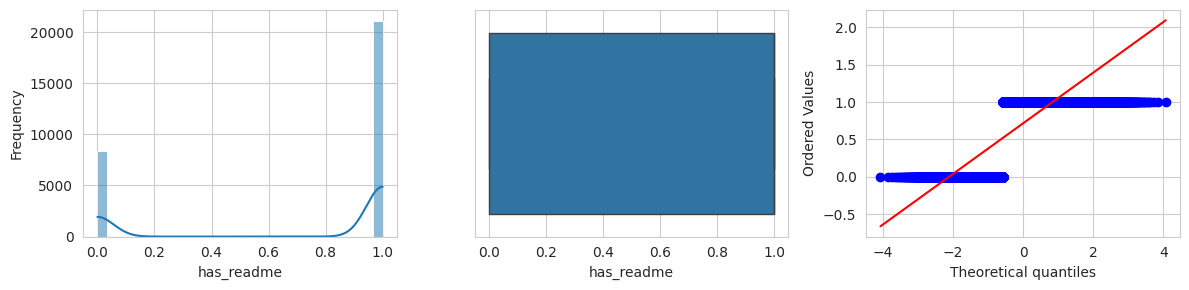




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


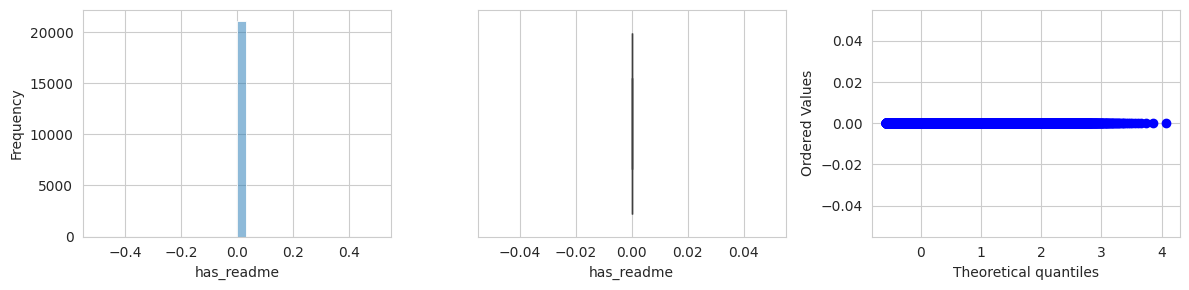




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


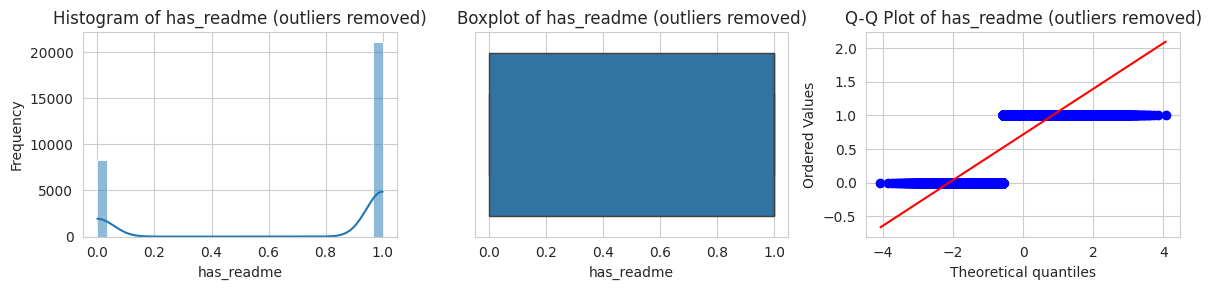




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


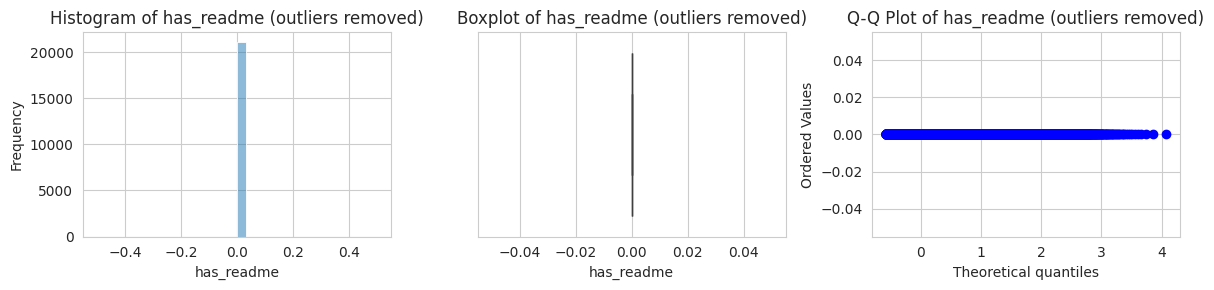

In [ ]:
column = 'has_readme'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

###### Exploring column `has_homepage`
Not using this column as its not significant to define any useful state


       has_homepage
count  29450.000000
mean       0.556469
std        0.496809
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

Observing original distributions
----------------------------------------------------------------------------------------------


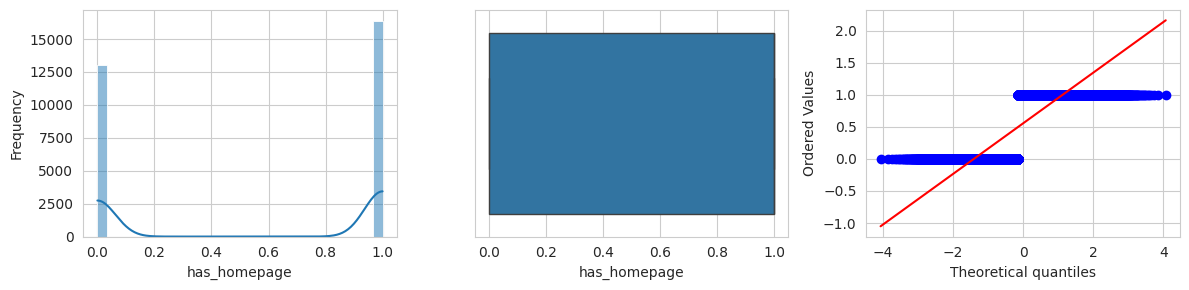




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


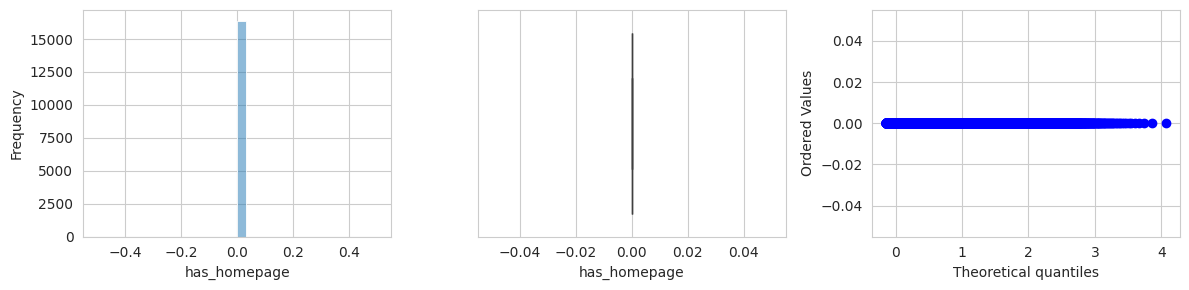




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


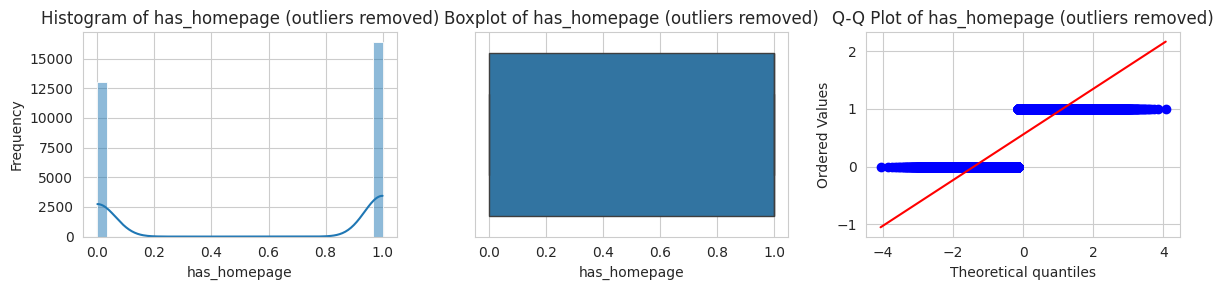




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


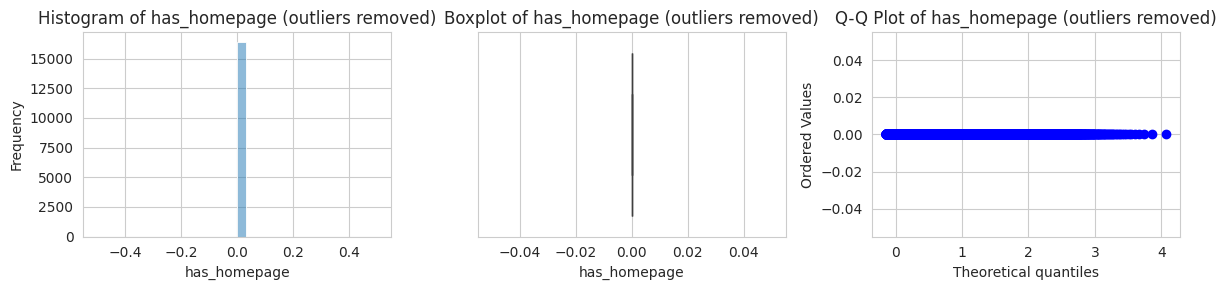

In [ ]:
column = 'has_homepage'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

###### Exploring column `is_deprecated`
Used

To be used to define deprecated state

       is_deprecated
count   29450.000000
mean        0.034805
std         0.183288
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

Observing original distributions
----------------------------------------------------------------------------------------------


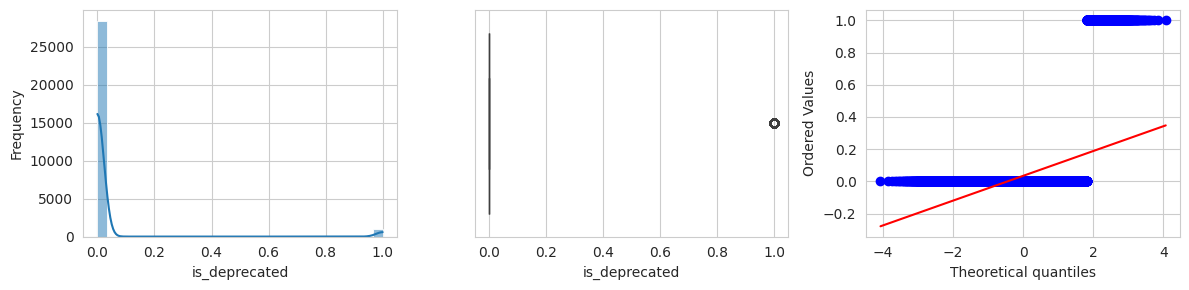




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


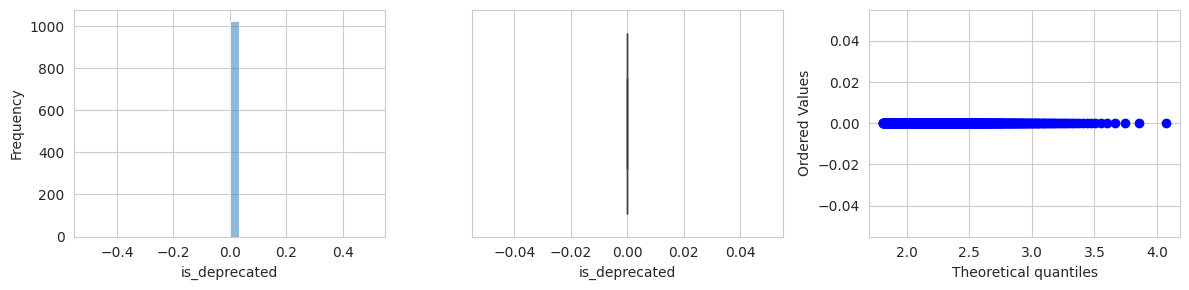




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


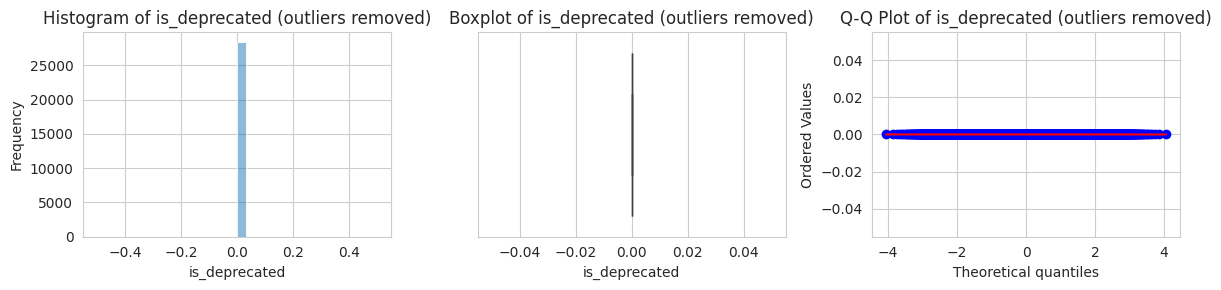




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: List of boxplot statistics and `positions` values must have same the length

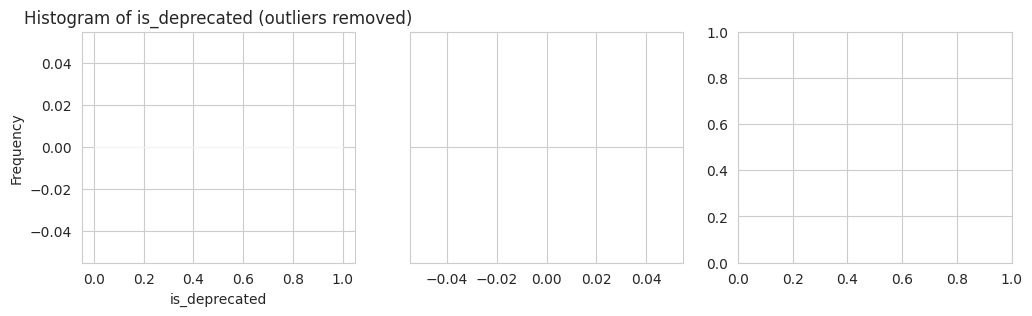

In [ ]:
column = 'is_deprecated'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

###### Exploring column `no_of_dependencies`
Used, after taking log

To be used for triviality

       no_of_dependencies
count        30000.000000
mean             9.402700
std             15.663852
min              0.000000
25%              0.000000
50%              4.000000
75%             13.000000
max            779.000000

Observing original distributions
----------------------------------------------------------------------------------------------


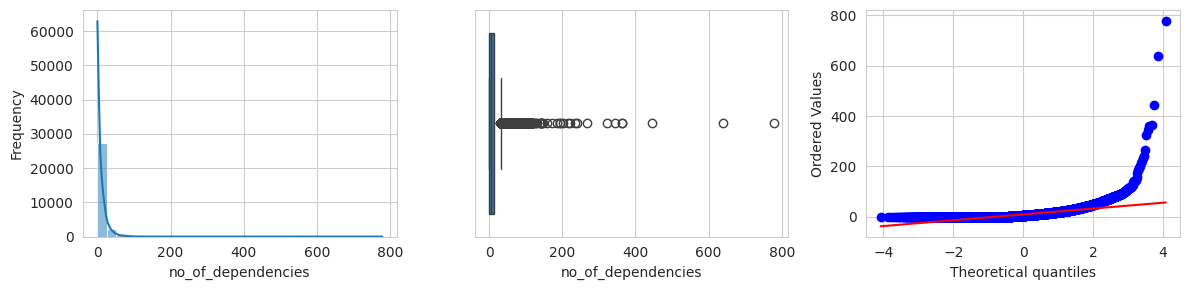




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


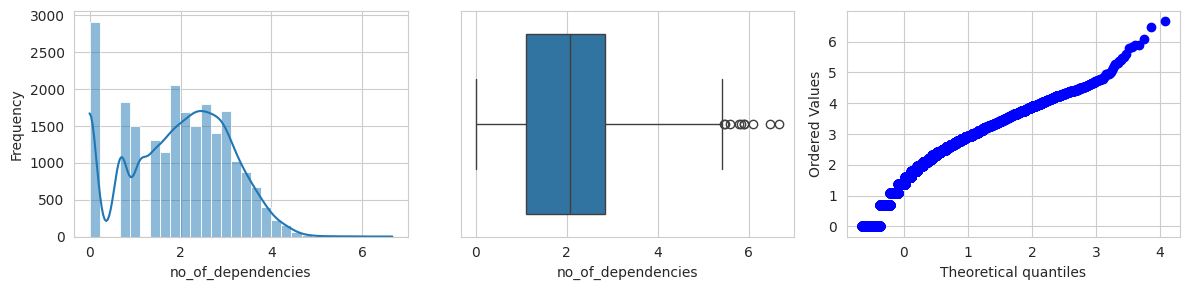




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


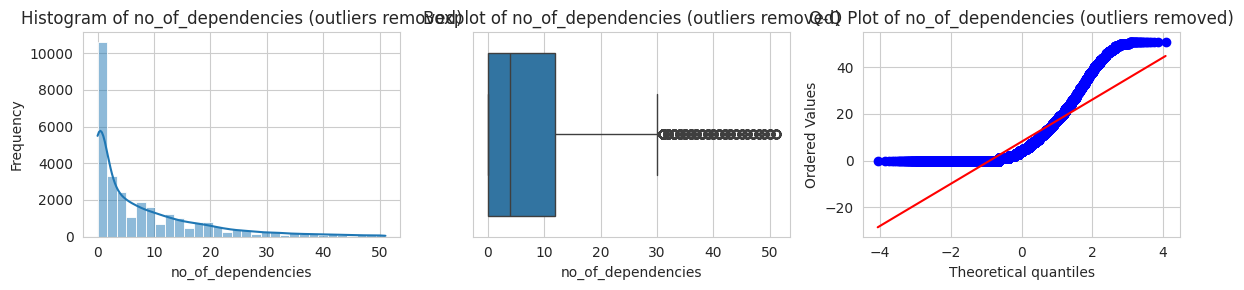




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


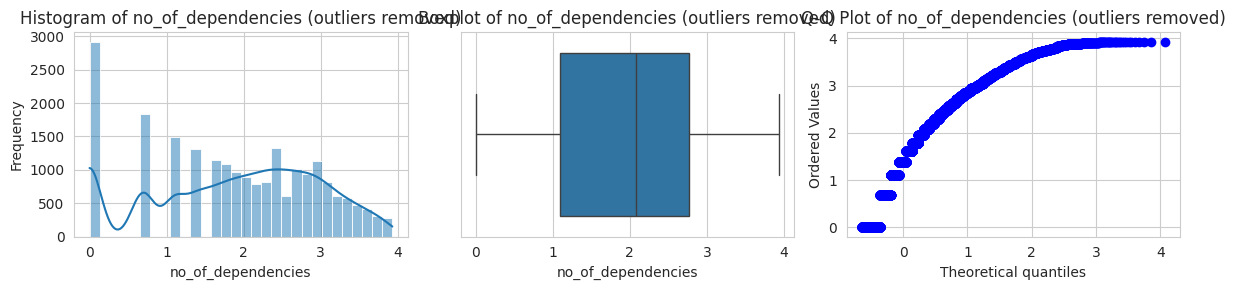

In [ ]:
column = 'no_of_dependencies'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

###### Exploring column `lagging_dependencies_count`
Used, after taking log

To be used for RQ3


       lagging_dependencies_count
count                29450.000000
mean                     9.274397
std                     15.446320
min                      0.000000
25%                      0.000000
50%                      4.000000
75%                     13.000000
max                    779.000000

Observing original distributions
----------------------------------------------------------------------------------------------


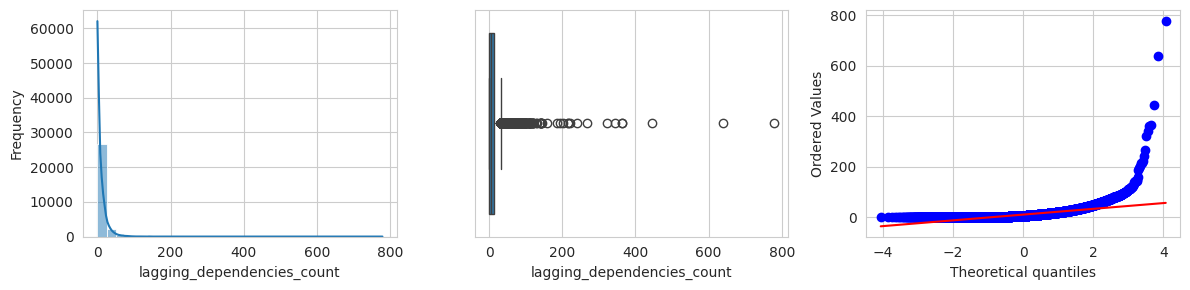




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


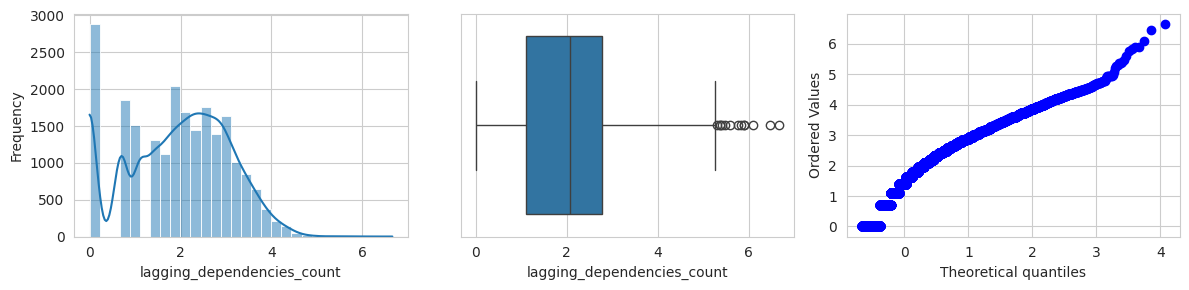




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


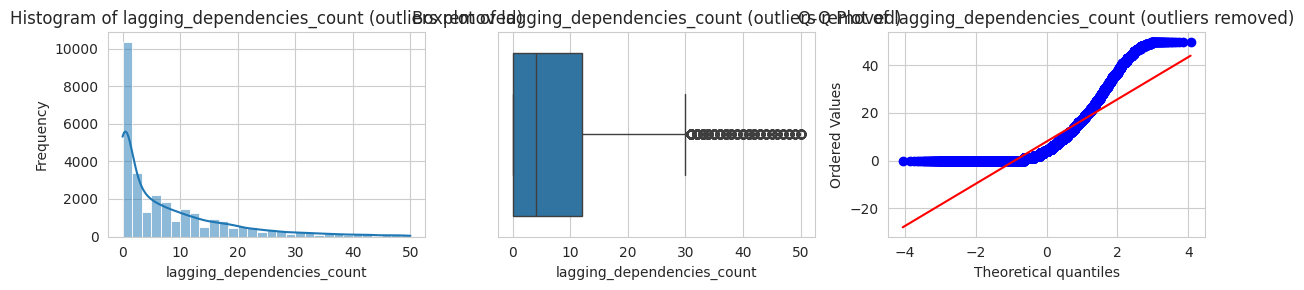




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


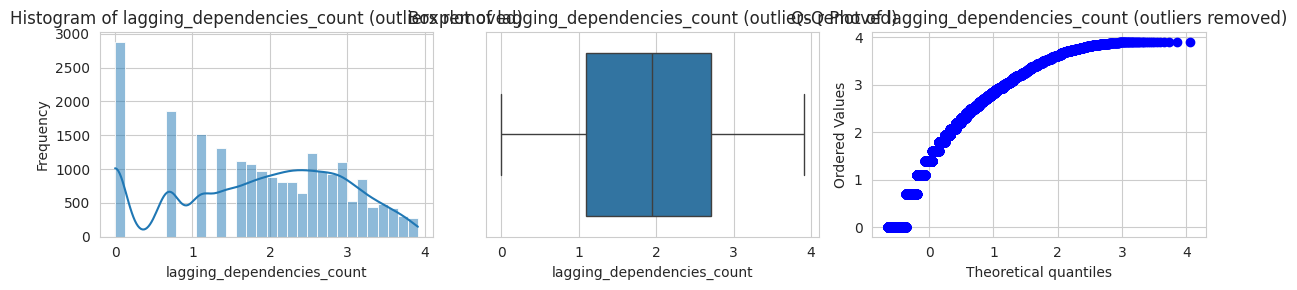

In [ ]:
column = 'lagging_dependencies_count'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

###### Exploring column `unpack_size`

Used, after taking log


To be used for triviality,active and dead states
> High download and unpack count --> Active
>
> Low download and unpack count --> Dead

        unpack_size
count  2.392600e+04
mean   1.589009e+06
std    1.486133e+07
min    3.800000e+01
25%    5.894500e+03
50%    2.614800e+04
75%    1.718538e+05
max    1.390478e+09

Observing original distributions
----------------------------------------------------------------------------------------------


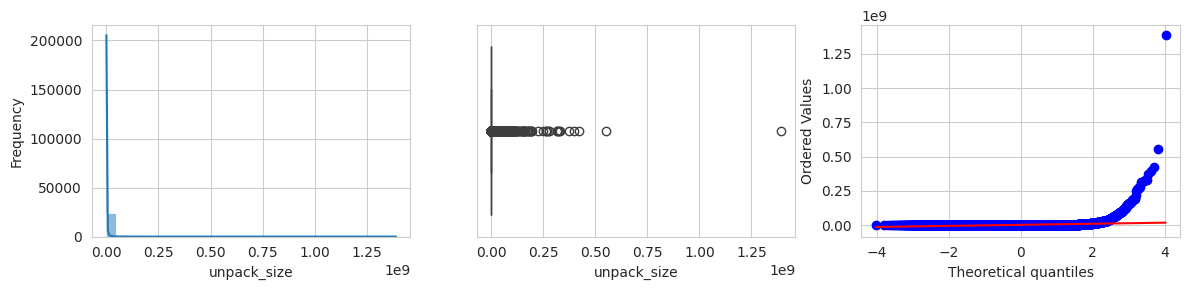




Observing log distributions
----------------------------------------------------------------------------------------------


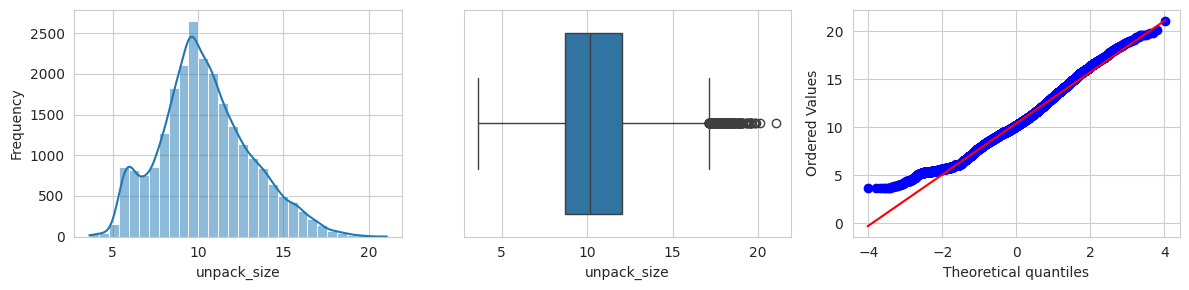




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


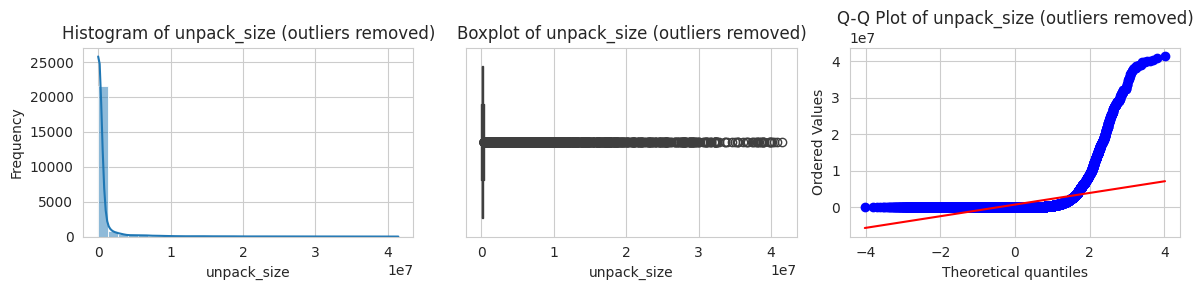




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


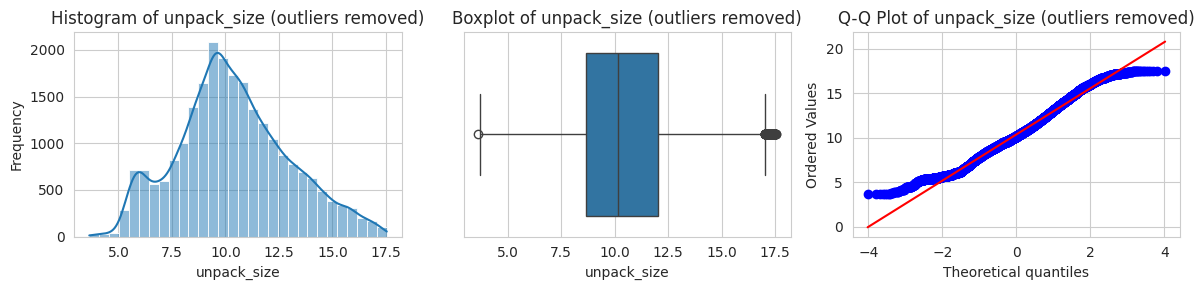

In [ ]:
column = 'unpack_size'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

###### Exploring column `file_count`

Used, after taking care of outliers and taking log

To be used for triviality(inversely proportional)

         file_count
count  23926.000000
mean      66.835158
std      713.072616
min        1.000000
25%        5.000000
50%       10.000000
75%       26.000000
max    56416.000000

Observing original distributions
----------------------------------------------------------------------------------------------


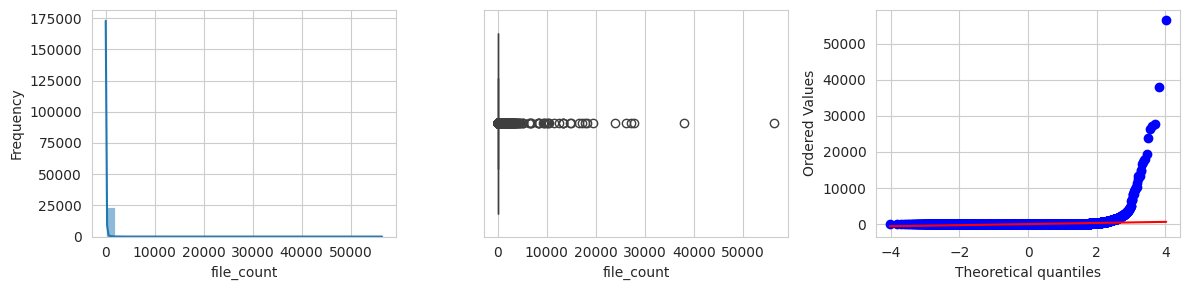




Observing log distributions
----------------------------------------------------------------------------------------------


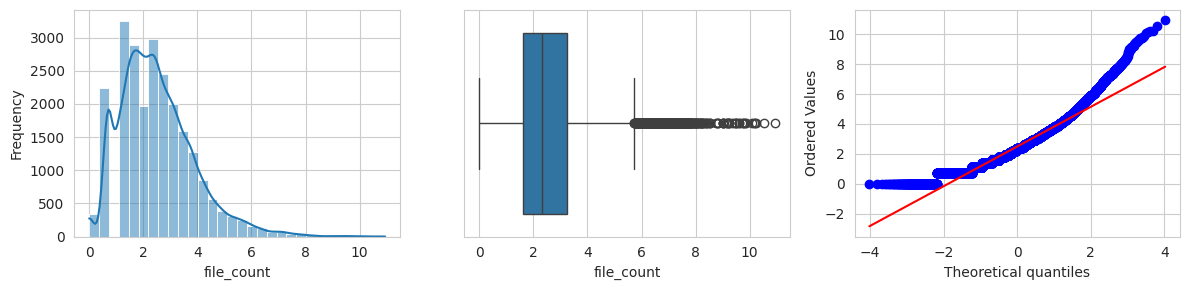




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


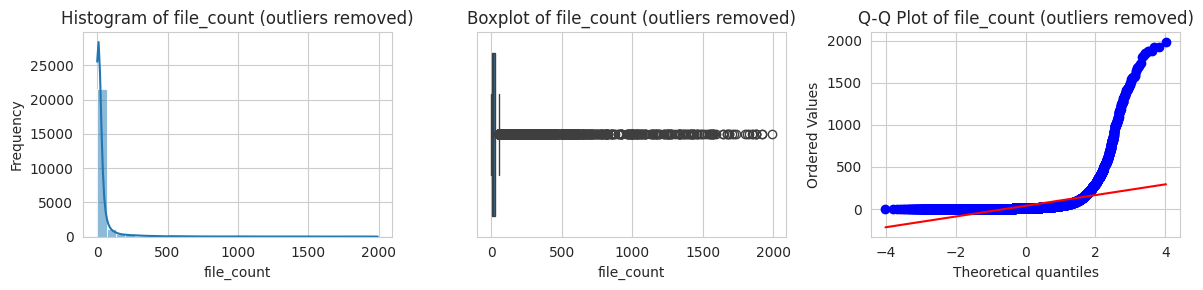




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


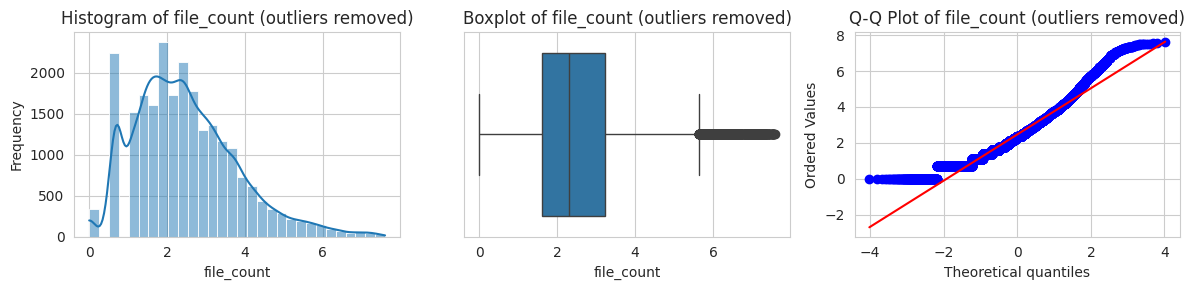

In [ ]:
column = 'file_count'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

###### Exploring column `has_repository`
Used

To be used for validation
> For eg we will find the the trends based on source availability

       has_repository
count    29450.000000
mean         0.617555
std          0.485993
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000

Observing original distributions
----------------------------------------------------------------------------------------------


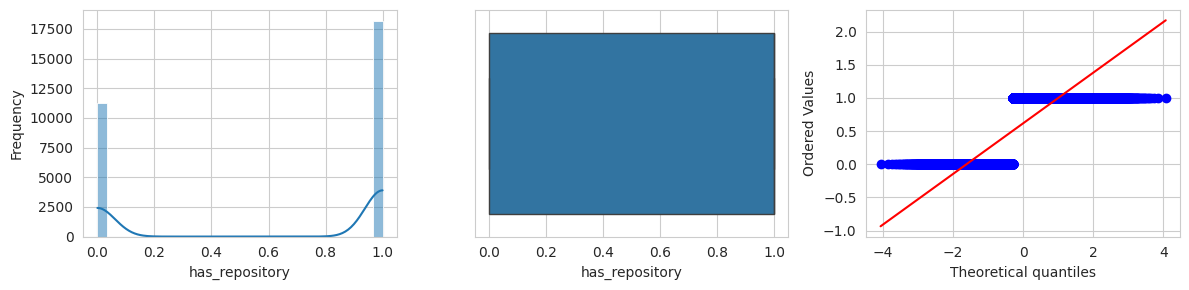




Observing log distributions
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


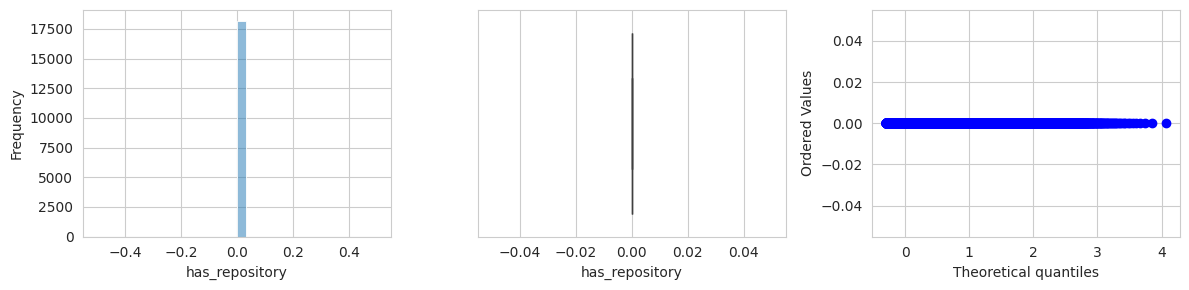




Observing original distributions after taking care of outliers
----------------------------------------------------------------------------------------------


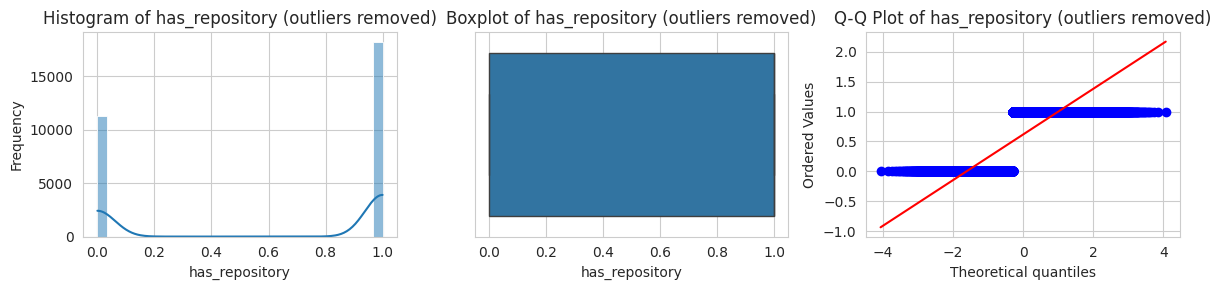




Observing log distributions after taking care of outliers
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


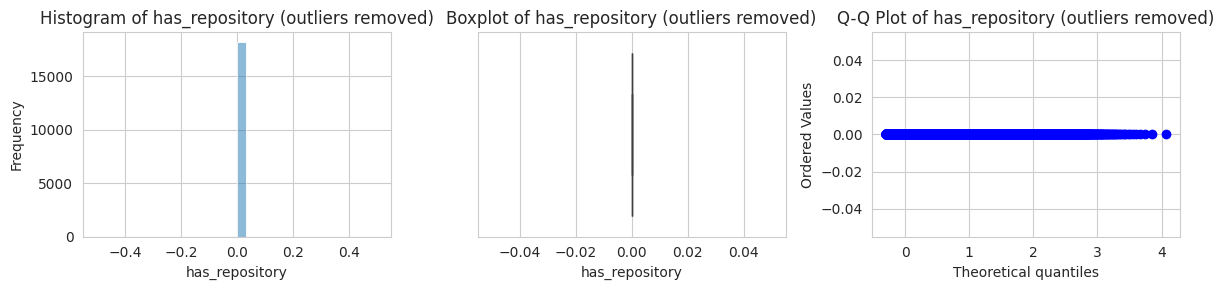

In [ ]:
column = 'has_repository'
df, formatted_stats = get_df_and_formatted_stats(column)
print()
visualize_column(df, column)

# Adding finalized columns to new table `package_metrics`

In [ ]:
def add_column_if_not_exists(cursor, table_name, column_name, column_definition):
  # check if the column already exists
  cursor.execute(f"PRAGMA table_info({table_name});")
  existing_columns = [column[1] for column in cursor.fetchall()]

  if column_name not in existing_columns:
    # add the column if it does not exist
    cursor.execute(f"ALTER TABLE {table_name} ADD COLUMN {column_name} {column_definition};")

In [ ]:
conn = sqlite3.connect("final_database.db")
cursor = conn.cursor()
cursor.execute("""
    CREATE TABLE IF NOT EXISTS package_metrics (
        package TEXT
    )
""")

conn.commit()

In [ ]:
with open('columns_to_consider.txt', "r") as file:
  columns_to_consider = file.read()

columns_to_consider = json.loads(columns_to_consider)
n_cols = len(columns_to_consider)

# columns other than `package`
columns = [[metric, 'TEXT DEFAULT NULL'] for metric in columns_to_consider]

# adding columns to the table
for col in columns:
  add_column_if_not_exists(cursor, 'package_metrics', col[0], col[1])

conn.commit()
sql_query = """
    INSERT INTO package_metrics (package)
    SELECT p.package
    FROM package_data p
    LEFT JOIN package_metrics m ON p.package = m.package
    WHERE m.package IS NULL
"""
cursor.execute(sql_query)
conn.commit()
pd.read_sql_query(f"SELECT * FROM package_metrics", conn)

,package,rank,dependants_count,dependant_repos_count,forks,stars,watchers,issues,pr,contributors,...,total_lines_of_code,sloc,no_of_files,health_score,security_numeric,popularity_numeric,maintenance_numeric,community_numeric,days_since_last_modification,is_deprecated
0,@gerrico/react-components,None,1.09861228866811,1.09861228866811,0.0,0.0,0.0,0,0.0,0.0,...,7.39756153552405,7.38025578842646,None,30,50,20,5,20,559,0
1,express-simple-app-generator,6,0.0,0.0,None,None,None,None,None,None,...,None,None,None,54,100,20,50,20,149,0
2,generator-giraffe,10,0.0,1.09861228866811,0.0,0.693147180559945,0.0,0,0.0,0.0,...,8.23615566168312,7.19443685110033,None,36,50,20,5,20,614,0
3,outdated-client,3,0.693147180559945,0.0,None,None,None,None,None,None,...,None,None,None,28,50,20,5,20,651,0
4,@semi-bot/semi-theme-shopify,None,None,None,None,None,None,None,None,None,...,None,None,None,40,100,20,5,20,561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,haribotify,10,1.6094379124341,0.0,None,None,None,None,None,None,...,None,None,None,42,100,20,5,20,614,0
29996,eslint-config-sharecar,7,0.0,1.38629436111989,0.0,0.0,0.0,0,0.0,0.0,...,7.44541755670169,1.94591014905531,None,42,100,20,5,20,615,0
29997,webpack-to-ardoq,4,0.0,0.0,None,None,None,None,None,None,...,None,None,None,40,50,10,5,20,134,0
29998,zywave-content-search,3,0.0,0.0,None,None,None,None,None,None,...,None,None,None,28,50,20,5,20,638,0


In [ ]:
def update_column_data(column, outliers_removed = False, take_log = False):
  df = get_df(f"SELECT package, {column} FROM package_data WHERE {column} IS NOT NULL")
  df[column] = df[column].astype(float)

  if outliers_removed:
    z_scores = stats.zscore(df[column])
    threshold = 2.7
    df = df[(abs(z_scores) < threshold)]

  if take_log:
    df[column] = np.where(df[column] > 0, np.log(df[column]), np.log1p(df[column]))

  df.to_sql('temp_table', conn, if_exists='replace', index=False)

  cursor.execute("""
      UPDATE package_metrics
      SET {column} = t.{column}
      FROM temp_table AS t
      WHERE package_metrics.package = t.package
  """.format(column=column))
  conn.commit()

In [ ]:
update_column_data('no_of_dependencies', take_log = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
update_column_data('is_deprecated')

In [ ]:
update_column_data('lagging_dependencies_count', take_log=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
update_column_data('unpack_size', take_log = True)

In [ ]:
update_column_data('file_count', outliers_removed=True, take_log=True)

In [ ]:
update_column_data('has_repository')

In [ ]:
conn.close()